# CO2
CO2 mole fraction, gapfilled with MDS;	µmolCO2 mol-1

In [1]:
# 02_co2.R
# This script reads half-hourly CO2 data, aggregates it to daily values,
# and writes the result to a CSV file.

# ---- Package Installation and Loading ----
# Ensure required packages are installed and loaded
required_packages <- c("dplyr", "lubridate")
installed_packages <- rownames(installed.packages())
for (pkg in required_packages) {
    if (!pkg %in% installed_packages) {
        install.packages(pkg, dependencies = TRUE)
    }
    library(pkg, character.only = TRUE)
}

# ---- Data Reading ----
# Read the half-hourly measurement file (CSV)
co2_data <- read.csv("../data/FLX_CH-Oe2_FLUXNET2015_FULLSET_2004-2023_1-3/FLX_CH-Oe2_FLUXNET2015_FULLSET_DD_2004-2023_1-3.csv")

# filter data for CO2_F_MDS variable
co2_data <- co2_data %>%
    select(TIMESTAMP, CO2_F_MDS)
head(co2_data)
# convert TIMESTAMP to Date type yyyy-mm-dd from YYYYMMDD format
co2_data$TIMESTAMP <- as.Date(as.character(co2_data$TIMESTAMP), format = "%Y%m%d")
head(co2_data)

# save to csv file
write.csv(co2_data, "../data/01_data_prep/07_co2.csv", row.names = FALSE)


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union



Attache Paket: 'lubridate'


Die folgenden Objekte sind maskiert von 'package:base':

    date, intersect, setdiff, union




,TIMESTAMP,CO2_F_MDS
,<int>,<dbl>
1,20040101,384.872
2,20040102,377.952
3,20040103,385.627
4,20040104,402.001
5,20040105,437.166
6,20040106,507.266


,TIMESTAMP,CO2_F_MDS
,<date>,<dbl>
1,2004-01-01,384.872
2,2004-01-02,377.952
3,2004-01-03,385.627
4,2004-01-04,402.001
5,2004-01-05,437.166
6,2004-01-06,507.266


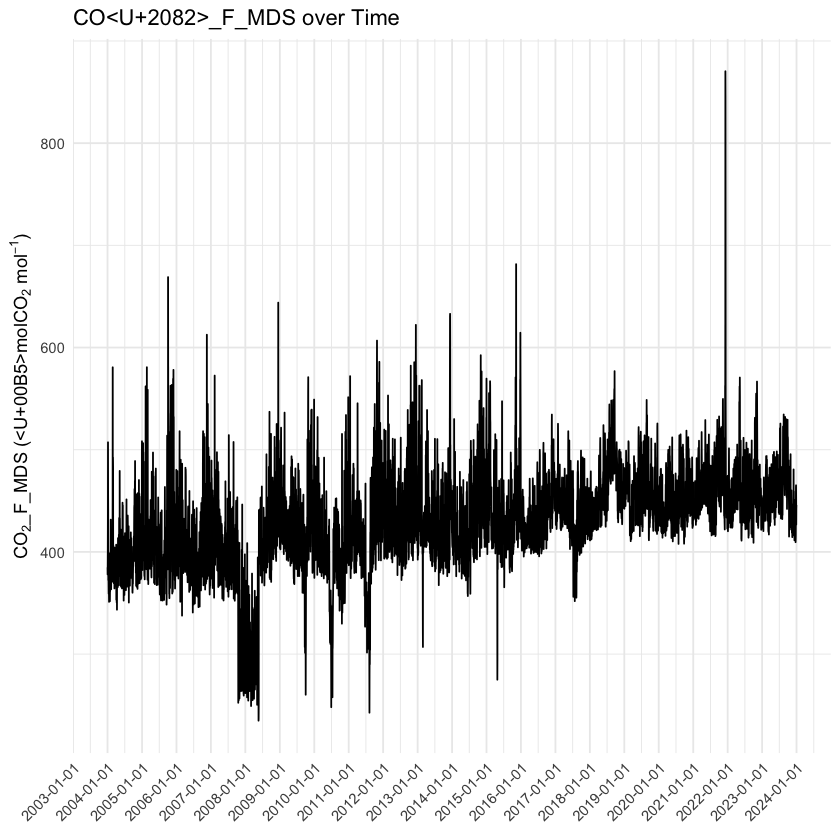

In [33]:
# plot the CO2_F_MDS variable
library(ggplot2)
plot <- ggplot(co2_data, aes(x = TIMESTAMP, y = CO2_F_MDS)) +
    geom_line() +
    labs(title = "CO₂_F_MDS over Time", y = expression("CO"[2]*"_F_MDS (µmolCO"[2]*" mol"^{-1}*")")) +
    scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 year") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(axis.title.x = element_blank())

plot
# save plot
ggsave("../data/01_data_prep/trend_plots/08_CO2_F_MDS_plot.png", plot, width = 10, height = 4, dpi = 300, bg = "white")